Saving encrypted_image.png to encrypted_image.png
Image dimensions: (864, 1152)
l1 (max power of 2 dividing m1): 5
l2 (max power of 2 dividing n1): 7
Enter l (1 ≤ l ≤ min(5, 7)): 4
Enter a (used in encryption, coprime to m1*n1+1 = 995329): 13
Enter inverse permutation alpha' (space-separated 16 integers from 1 to 16):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
Enter inverse permutation beta' (space-separated 16 integers from 1 to 16):
16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1


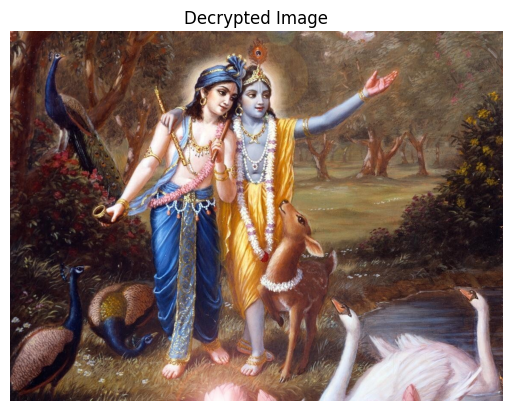

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 📌 Required Libraries
import numpy as np
import cv2
from math import ceil
from google.colab import files
from PIL import Image
import io
import matplotlib.pyplot as plt

# 📌 Step 1: Upload Encrypted Image
uploaded = files.upload()

# Load and convert to RGB
for fname in uploaded.keys():
    image = Image.open(io.BytesIO(uploaded[fname])).convert('RGB')
    break  # Only one image

B = np.array(image)
m1, n1, channels = B.shape

# 📌 Step 2: Check for even dimensions
if m1 % 2 != 0 or n1 % 2 != 0:
    raise ValueError("Image dimensions must be even.")

# 📌 Step 3: Compute l1 and l2
def max_power_of_2_dividing(n):
    power = 0
    while n % 2 == 0:
        n //= 2
        power += 1
    return power

l1 = max_power_of_2_dividing(m1)
l2 = max_power_of_2_dividing(n1)
print(f"Image dimensions: ({m1}, {n1})")
print(f"l1 (max power of 2 dividing m1): {l1}")
print(f"l2 (max power of 2 dividing n1): {l2}")

# 📌 Step 4: Input Parameters
l = int(input(f"Enter l (1 ≤ l ≤ min({l1}, {l2})): "))
if not (1 <= l <= min(l1, l2)):
    raise ValueError("Invalid l")

L = 2 ** l
a = int(input(f"Enter a (used in encryption, coprime to m1*n1+1 = {m1 * n1 + 1}): "))
modulus = m1 * n1 + 1

# 📌 Compute modular inverse of a mod (m1*n1 + 1)
def modinv(a, m):
    r1, r2 = a, m
    t1, t2 = 1, 0
    while r2 != 0:
        q = r1 // r2
        r1, r2 = r2, r1 - q * r2
        t1, t2 = t2, t1 - q * t2
    return t1 % m

a_inv = modinv(a, modulus)

# 📌 Step 5: Input alpha' and beta' (inverse permutations)
print(f"Enter inverse permutation alpha' (space-separated {L} integers from 1 to {L}):")
alpha_inv = list(map(int, input().split()))
if sorted(alpha_inv) != list(range(1, L + 1)):
    raise ValueError("Invalid permutation alpha'")

print(f"Enter inverse permutation beta' (space-separated {L} integers from 1 to {L}):")
beta_inv = list(map(int, input().split()))
if sorted(beta_inv) != list(range(1, L + 1)):
    raise ValueError("Invalid permutation beta'")

# 📌 Step 6: Initialize Decrypted Image
B_prime = np.zeros_like(B)

# 📌 Step 7: Decryption Loop
for i in range(m1):
    for j in range(n1):
        k_prime = i * n1 + (j + 1)
        k = (a_inv * k_prime) % modulus

        Q = k // n1
        R = k % n1

        if R != 0:
            i1 = Q + 1
            j1 = R
        else:
            i1 = Q
            j1 = n1

        x = (ceil(i1 / L) - 1) * L
        y = (ceil(j1 / L) - 1) * L

        # ✅ Adjust indexing (1-based to 0-based for Python)
        i_prime = x + alpha_inv[i1 - x - 1]
        j_prime = y + beta_inv[j1 - y - 1]

        i_p = i_prime - 1  # Convert to 0-based
        j_p = j_prime - 1

        B_prime[i_p, j_p, :] = B[i, j, :]

# 📌 Step 8: Show and Save Decrypted Image
decrypted_img = Image.fromarray(B_prime)
plt.imshow(decrypted_img)
plt.title("Decrypted Image")
plt.axis('off')
plt.show()

output_name = "decrypted_image.png"
decrypted_img.save(output_name)
files.download(output_name)
